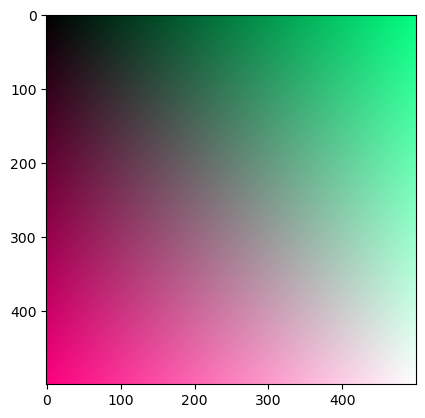

In [1]:
# step 0, import it
import numpy as np
import random
import numpy as np
from matplotlib import pyplot as plt


# Step 1, start a new figure
plt.figure()

# Step 2, prepare your image, which should be a array with shape like
# (n, m, 1) for gray picture
# (n, m, 3) for rgb picture
# (n, m, 4) for rgba picture
n = 500
m = 500
img = np.zeros((n, m, 4))
for i in range(n):
    for j in range(m):
        img[i][j][0] = i / n
        img[i][j][1] = j / m
        img[i][j][2] = (i + j) / (n + m)
        img[i][j][3] = 1

# Step 3, draw and show
plt.imshow(img)
plt.show()

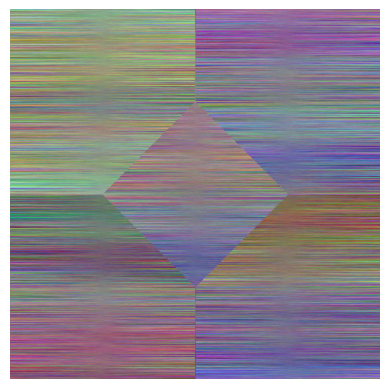

In [2]:
def visit(x, y, rgb_list):
    # check if (x, y) is out of figure
    if x < 0 or x >= n or y < 0 or y >= m:
        return
    # if we have not visited

    if img[x][y][3] == 0:
        r = rgb_list[0]
        g = rgb_list[1]
        b = rgb_list[2]

        if random.random() > 0.5:
            img[x][y][0] = r + color_change
        else:
            img[x][y][0] = r - color_change

        if random.random() > 0.5:
            img[x][y][1] = g + color_change
        else:
            img[x][y][1] = g - color_change

        if random.random() > 0.5:
            img[x][y][2] = b + color_change
        else:
            img[x][y][2] = b - color_change

        # make all rgb valid
        img[x][y][0] = valid(img[x][y][0])
        img[x][y][1] = valid(img[x][y][1])
        img[x][y][2] = valid(img[x][y][2])

        # we assign it to 1 for Alpha channel

        img[x][y][3] = 1
        rgb_list = [img[x][y][0], img[x][y][1], img[x][y][2]]

        # push (x, y) to waiting_list
        waiting_list.append((x, y))


def valid(a):
    if a < 0:
        a = 0
    if a > 1:
        a = 1
    return a


# -------------------------------------start here-------------------------------------
plt.figure()
n = 500
m = 500
color_change = 0.01
img = np.zeros((n, m, 4))  # rgba format image
# create a waiting list for indexes
waiting_list = []

# # add the center point
x = n // 2
y = m // 2
img[x][y][0] = 0.5
img[x][y][1] = 0.5
img[x][y][2] = 0.5
waiting_list.append((x, y))

# add another point
x = 1 * n // 4
y = 1 * m // 4
img[x][y][0] = 0.5
img[x][y][1] = 0.5
img[x][y][2] = 0.5
waiting_list.append((x, y))

# add another point
x = 1 * n // 4
y = 3 * m // 4
img[x][y][0] = 0.5
img[x][y][1] = 0.5
img[x][y][2] = 0.5
waiting_list.append((x, y))

# add another point
x = 3 * n // 4
y = 1 * m // 4
img[x][y][0] = 0.5
img[x][y][1] = 0.5
img[x][y][2] = 0.5
waiting_list.append((x, y))

# add another point
x = 3 * n // 4
y = 3 * m // 4
img[x][y][0] = 0.5
img[x][y][1] = 0.5
img[x][y][2] = 0.5
waiting_list.append((x, y))

while len(waiting_list) != 0:
    # choose a random (x, y) form waiting_list
    # random choosing
    # random_index = random.randint(0, len(waiting_list) - 1)

    # DFS
    # random_index = len(waiting_list) - 1

    # BFS
    random_index = 0

    x, y = waiting_list[random_index]
    del waiting_list[random_index]  # delete (x, y) in waiting_list

    # got its rbg value
    r = img[x][y][0]
    g = img[x][y][1]
    b = img[x][y][2]
    rgb_list = [r, g, b]

    # 4 neighbors
    #   *
    # * X *
    #   *
    visit(x - 1, y, rgb_list)
    visit(x + 1, y, rgb_list)
    visit(x, y - 1, rgb_list)
    visit(x, y + 1, rgb_list)

    # 8 neighbors
    # * * *
    # * X *
    # * * *
    # visit(x, y - 1, r, g, b)
    # visit(x - 1, y - 1, r, g, b)
    # visit(x - 1, y, r, g, b)
    # visit(x - 1, y + 1, r, g, b)
    # visit(x, y + 1, r, g, b)
    # visit(x + 1, y + 1, r, g, b)
    # visit(x + 1, y, r, g, b)
    # visit(x + 1, y - 1, r, g, b)

plt.axis("off")  # close axis
plt.imshow(img)
plt.show()
